<a href="https://colab.research.google.com/github/dfabrega2021/hello-world/blob/main/Lending%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

In [53]:
import numpy as np

In [54]:
path = 'https://raw.githubusercontent.com/dfabrega2021/hello-world/refs/heads/main/applications.csv'

In [66]:
df_raw = pd.read_csv(path, header=None)

In [69]:
df = df_raw[0].str.split(',',expand=True) #selects the first (and only) column #split each row string into a list by commas # expand=True converts lists into columns

df.columns = df.iloc[0] #selects the first row of the DataFrame
df = df[1:] #slices the DataFrame to start from the second row (index 1) onward, dropping the old first row that we just used as column headers.

df =df.reset_index(drop=True)
df

,application_id,industry,monthly_revenue,advance_amount,factor_rate,approved,funded,defaulted,days_active,submission_date
0,1,Restaurant,85000,40000,1.30,1,1,0,180,2024-01-05
1,2,Salon,42000,25000,1.25,1,1,0,210,2024-01-07
2,3,Auto Repair,90000,45000,1.28,1,1,1,95,2024-01-10
3,4,Restaurant,70000,35000,1.32,1,1,1,60,2024-01-12
4,5,Salon,38000,20000,1.22,1,1,0,240,2024-01-15
5,6,Auto Repair,110000,50000,1.27,1,1,0,200,2024-01-18
6,7,Restaurant,60000,30000,1.35,1,1,1,45,2024-01-20
7,8,Salon,30000,15000,1.20,0,0,0,0,2024-01-22
8,9,Auto Repair,95000,48000,1.29,1,1,0,170,2024-01-25
9,10,Restaurant,52000,28000,1.34,0,0,0,0,2024-01-28


In [70]:
numeric_columns = ['application_id','monthly_revenue','advance_amount','factor_rate','approved','funded','defaulted','days_active']

In [75]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df['submission_date'] = pd.to_datetime(df['submission_date'])

**Exploration of dataset**
* Inspect data types
* Identify any missing or suspicious values
* Briefly describe the distribution of advance amounts

There are 0 missing values

In [78]:
df.isnull().sum()

,0
0,
application_id,0
industry,0
monthly_revenue,0
advance_amount,0
factor_rate,0
approved,0
funded,0
defaulted,0
days_active,0


Supicious numbers

In [82]:
for col in numeric_columns:
  zeros = (df[col]==0).sum()
  print(f"{col} {zeros} zero(s)")

application_id 0 zero(s)
monthly_revenue 0 zero(s)
advance_amount 0 zero(s)
factor_rate 0 zero(s)
approved 2 zero(s)
funded 2 zero(s)
defaulted 10 zero(s)
days_active 2 zero(s)


Look for duplicate applications

In [85]:
duplicates = df['application_id'].duplicated().sum()
print(f"Duplicate application IDs: {duplicates}")

Duplicate application IDs: 0


Check suspicious submission dates

In [86]:
# Check for submission dates in the future or null. Submissions date should not be in the future
future_dates = (df['submission_date'] > pd.Timestamp.today()).sum()
print(f"Submission dates in the future: {future_dates}")

Submission dates in the future: 0


Briefly describe the advance amounts

In [88]:
df['advance_amount'].describe()

,advance_amount
count,15.00000
mean,34200.00000
std,12048.71066
min,15000.00000
25%,25500.00000
50%,35000.00000
75%,43500.00000
max,52000.00000


In [90]:
import matplotlib.pyplot as plt

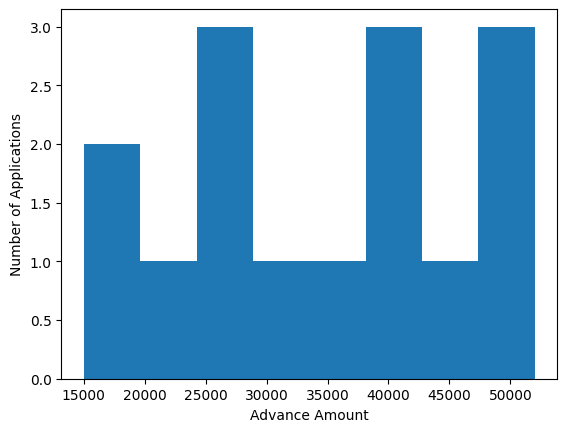

In [95]:
plt.hist(df['advance_amount'], bins=8)
plt.xlabel('Advance Amount')
plt.ylabel('Number of Applications')
plt.show()

Advance amount by industry

In [97]:
df.groupby('industry')['advance_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Auto Repair,5.0,47400.0,3974.921383,42000.0,45000.0,48000.0,50000.0,52000.0
Restaurant,5.0,34400.0,5319.774431,28000.0,30000.0,35000.0,39000.0,40000.0
Salon,5.0,20800.0,4658.325880,15000.0,18000.0,20000.0,25000.0,26000.0


Create the following columns: Total Payback

In [99]:
df['total_payback'] = df['advance_amount'] * df['factor_rate']

In [102]:
df['gross_profit'] = df['total_payback']-df['advance_amount']

In [109]:
summary = df.groupby('industry').agg(
    approval_rate=('approved','mean'),
    default_rate=('defaulted','mean'),
    avg_advance=('advance_amount','mean'),
    avg_factor    = ('factor_rate', 'mean'),
    avg_profit    = ('gross_profit', 'mean')
)
summary['approval_rate'] = summary['approval_rate'] * 100
summary['default_rate']  = summary['default_rate'] * 100
summary=summary.round({
    'approval_rate': 1,
    'default_rate': 1,
    'avg_advance': 0,
    'avg_factor': 2,
    'avg_profit': 0
})
summary

,approval_rate,default_rate,avg_advance,avg_factor,avg_profit
industry,,,,,
Auto Repair,100.0,40.0,47400.0,1.28,13416.0
Restaurant,80.0,40.0,34400.0,1.33,11218.0
Salon,80.0,20.0,20800.0,1.23,4946.0
